#### Import Libraries

In [21]:
import pandas as pd
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

#### Set Pandas View

In [26]:
pd.set_option('display.width', 320,
              'display.max_columns', 10)

#### Create all_data.csv file containing all the data from other csv files

In [25]:
all_files = [file for file in os.listdir('./Documents/Keith_Co_Data')]

all_months_data = pd.DataFrame()

for file in all_files:
    df = pd.read_csv('./Documents/Keith_Co_Data/' + file)
    all_months_data = pd.concat([all_months_data, df])

all_months_data.to_csv('./Documents/Keith_Co_Data/all_data.csv', index=Fal)


#### Data Reading & Data Cleaning

In [28]:
all_data = pd.read_csv('./Documents/Keith_Co_Data/all_data.csv')
nan_df = all_data[all_data.isna().any(axis=1)]
all_data = all_data.dropna(how='all')
all_data = all_data[all_data['Order Date'].str[0:2] != 'Or']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


#### Add Month Column

In [30]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int64')

#### Convert string into integer & Add the Sales Column

In [40]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int64
Price Each          float64
Order Date           object
Purchase Address     object
Month                 int64
Sales               float64
City                 object
dtype: object

#### Add the City column - using Lambda in Python

In [68]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas (TX)
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston (MA)
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles (CA)
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles (CA)


#### Drop Duplicates

In [63]:
all_data = all_data.drop_duplicates()

#### Question 1: What was the best month for sales? How much was earned that month?

In [64]:
results = all_data.groupby('Month').sum()
print(results)

       Quantity Ordered  Price Each       Sales
Month                                          
1                 10893  1810924.81  1821413.16
2                 13431  2186940.38  2200078.08
3                 16979  2789084.64  2804973.35
4                 20536  3366218.76  3389217.98
5                 18653  3133134.61  3150616.23
6                 15234  2560503.50  2576280.15
7                 16054  2631225.12  2646461.32
8                 13429  2226963.90  2241083.37
9                 13091  2081897.65  2094465.69
10                22669  3713608.80  3734777.86
11                19769  3178872.53  3197875.05
12                28074  4583267.77  4608295.70


#### Visualizing the results

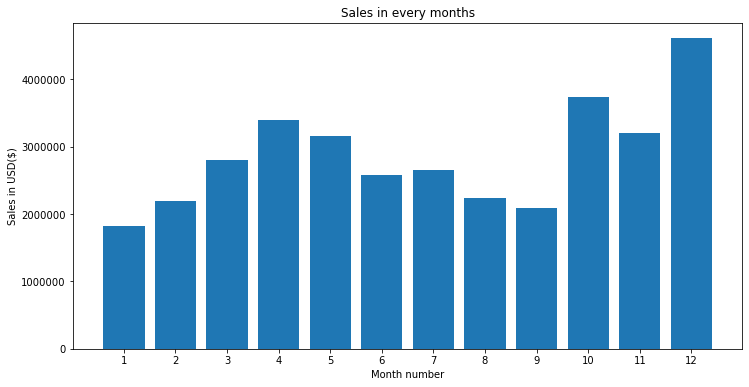

In [65]:
months = range(1, 13)
plt.figure(figsize=(12, 6))
plt.bar(months, results['Sales'])
plt.ticklabel_format(useOffset=False, style='plain')
plt.xticks(months)
plt.title('Sales in every months')
plt.ylabel('Sales in USD($)')
plt.xlabel('Month number')
plt.show()

#### Q1 Answer = December with Revenue at around $4,608,295

#### Question 2: What city has the highest number of Sales?

In [66]:
results = all_data.groupby('City').sum()

results

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16584,2778608.69,104649,2794199.07
Austin (TX),11137,1808340.03,69720,1818044.33
Boston (MA),22494,3634398.40,140898,3658627.65
Dallas (TX),16707,2750026.38,104447,2765373.96
Los Angeles (CA),33247,5417171.70,208020,5448304.28
New York City (NY),27903,4632920.54,175557,4661867.14
Portland (ME),2746,446752.36,17119,449321.38
Portland (OR),11291,1859836.44,70517,1870010.56
San Francisco (CA),50169,8204001.38,314949,8254743.55


#### Visualizing the results

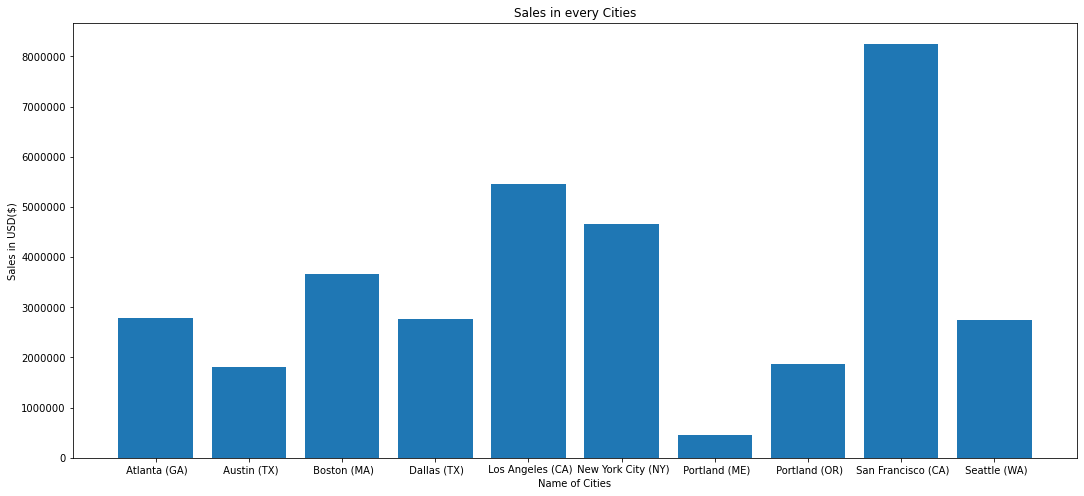

In [67]:
cities = [i for i, df in all_data.groupby('City')]
plt.figure(figsize=(18, 8))
plt.bar(cities, results['Sales'])
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(cities)
plt.title('Sales in every Cities')
plt.ylabel('Sales in USD($)')
plt.xlabel('Name of Cities')
plt.show()

In [69]:
# If scientific notation happens when printing float values, we can suppress it by using: 
# pd.options.display.float_format = '{:.2f}'.format

#### Q2 Answer = San Francisco (CA) with USD8,254,743 followed by Los Angeles (CA) with USD5,448,304

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

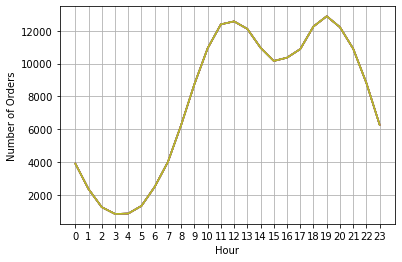

In [71]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])
all_data['Hour'] = all_data['Order Date'].dt.hour

hours = [hour for hour, df in all_data.groupby('Hour')]

plt.plot(hours, all_data.groupby('Hour').count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()

#### Q3 Answer = Recommendation from 11 A.M to 7 P.M

#### Question 4: What products are most often sold together?

#### Disable SettingWithCopyWarning

In [74]:
# reference: https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas
pd.options.mode.chained_assignment = None  # default='warn'

In [75]:
# Import essencial libraries
from itertools import combinations
from collections import Counter

count = Counter()

df = all_data[all_data['Order ID'].duplicated(keep=False)]
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Grouped']].drop_duplicates()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1002
('Google Phone', 'USB-C Charging Cable') 985
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 413
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 159
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### Q4 Answer = iPhone and Lightning Charging Cable

#### Question 5: What product sold the most? Why do you think it sold the most?

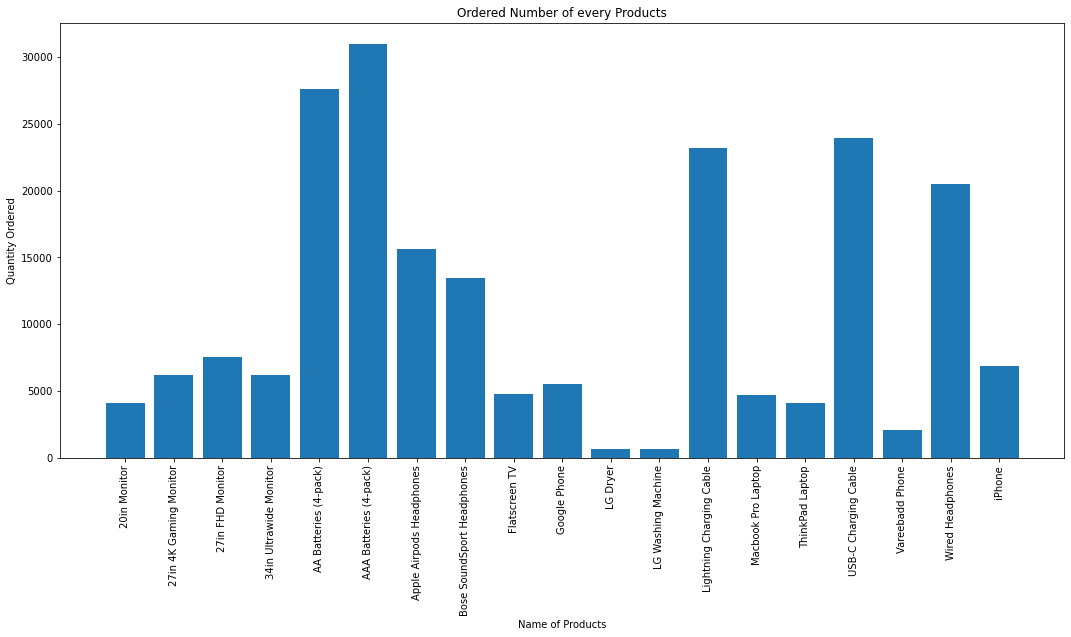

In [82]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group['Quantity Ordered'].sum()

products = [i for i, df in product_group]
plt.figure(figsize=(18, 8))
plt.bar(products, quantity_ordered)
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(products, rotation='vertical')
plt.title('Ordered Number of every Products')
plt.ylabel('Quantity Ordered')
plt.xlabel('Name of Products')
plt.show()

C:\Users\QUANGH~1\AppData\Local\Temp/ipykernel_13152/1498598292.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical')


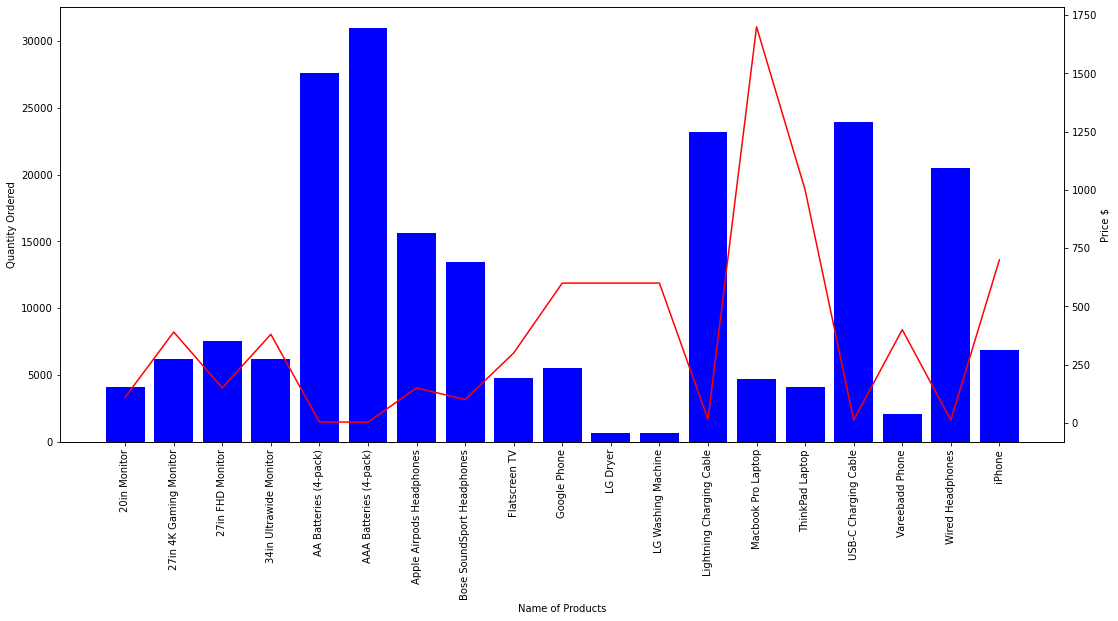

In [99]:
unit_price = all_data.groupby('Product')['Price Each'].mean()

fig, ax1 = plt.subplots(figsize=(18,8))
ax2 = ax1.twinx()

ax1.bar(products, quantity_ordered, color='b')
ax2.plot(products, unit_price, 'r')

ax1.set_xlabel('Name of Products')
ax1.set_xticklabels(products, rotation='vertical')
ax1.set_ylabel('Quantity Ordered')
ax2.set_ylabel('Price $')

plt.show()


#### Q5 Answer = As we can see the correlation between Quantity Ordered and Unit Price affecting to the Sales of each Products. The lower the price, the higher the sales of each product. AAA Batteries being ordered the most because of it's usages and it's cheap price 